In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

In [9]:
# Load Train data from our github repo
url_train = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train.csv'
dataDF_train = pd.read_csv(url_train)

# Load Train label data from our github repo
url_train_labels = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_train_labels.csv'
dataDF_train_labels = pd.read_csv(url_train_labels)

# Load Problem data from our github repo
url_problem = 'https://raw.githubusercontent.com/tjayada/iANNwTF_Project/main/data/cleaned%20data%20(1)/data_without_columns_test.csv'
dataDF_problem = pd.read_csv(url_problem)


In [10]:
# drop indexes 
dataDF_train = dataDF_train.drop("Unnamed: 0", axis = 1)
dataDF_train_labels = dataDF_train_labels.drop("Unnamed: 0", axis = 1)
dataDF_problem = dataDF_problem.drop("Unnamed: 0", axis = 1)

In [11]:
lm = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(78,))
])

lm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 79        
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [12]:
lm.predict(dataDF_train[:10])

array([[1.1797768 ],
       [0.90427244],
       [0.8420676 ],
       [1.0542773 ],
       [1.456313  ],
       [1.1764697 ],
       [0.77129436],
       [0.78504634],
       [1.3854886 ],
       [1.2191539 ]], dtype=float32)

In [13]:
lm.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [15]:
history = lm.fit(
    dataDF_train, dataDF_train_labels,
    batch_size = 64,
    epochs=200,
    verbose=0,
    validation_split = 0.1)

In [16]:
from sklearn.metrics import r2_score

y_pred = lm.predict(dataDF_train).astype(np.int64)
y_true = dataDF_train_labels.astype(np.int64)

r2_score(y_true, y_pred)

0.41000037004364964

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

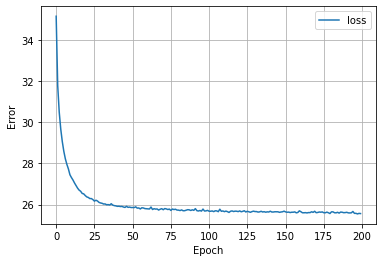

In [18]:
plot_loss(history)